# Methods overload

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

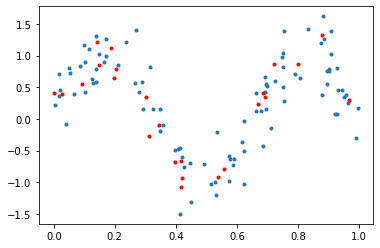

In [2]:
# Cook some simplistic data:
np.random.seed(1)
n_points = 120
x = np.random.uniform(size=n_points)
y = np.sin(x*3*np.pi) + np.random.normal(size=x.shape)/3

ind = list(range(np.round(n_points*0.2).astype(int)))
xtest = x[ind]
ytest = y[ind]
x = x[[i for i in range(n_points) if i not in ind ]]
y = y[[i for i in range(n_points) if i not in ind ]]

plt.plot(x,y,'.');
plt.plot(xtest, ytest, 'r.');

In [5]:
# Custom callback, to see what's happening during the training
# https://www.tensorflow.org/guide/keras/custom_callback

class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 20 == 0:
            print(f"{logs['loss']:0.3}", end=' ')

In [3]:
def make_model(size=None, learning_rate=0.002):
    # Let's build a model of leakyReLU units, so that we could have layer width==1, and still have gradients.
    # This woudl be useful for testing different shapes.
    # LeakyReLU cannot be set as a layer activation, it appears, but can be a separate layer.
    if size is None:
        size = (32, 32)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)), # https://www.tensorflow.org/api_docs/python/tf/keras/Input
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(loss='mean_squared_error',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 metrics=['mean_squared_error'])
    return model

model = make_model((8,89))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


0.541 0.476 0.366 0.238 0.213 0.209 0.21 0.204 0.203 0.201 0.195 0.202 0.192 0.188 0.182 0.18 0.177 0.171 0.169 0.165 0.161 0.155 0.15 0.156 0.142 0.144 0.136 0.133 0.129 0.125 0.129 0.119 0.118 0.119 0.115 

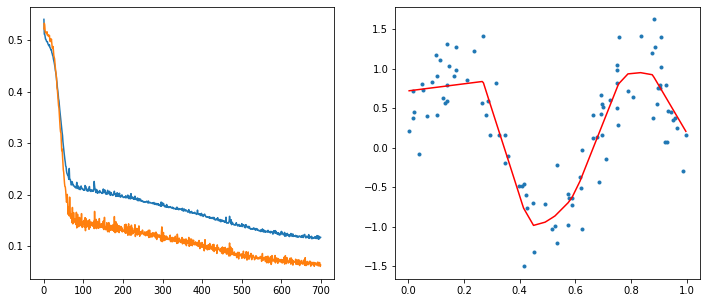

In [6]:
# Manual fit, once
history = model.fit(x, y,
                    batch_size=16,
                    epochs=700,
                    verbose=0,
                    callbacks=[CustomCallbacks()],
                    validation_data=(xtest, ytest) # Keeping this commented makes everything faster
                   )

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(history.history['loss']);
if 'val_loss' in history.history.keys():
    plt.plot(history.history['val_loss']);
    
plt.subplot(122)
y_new = model.predict(x)
plt.plot(x,y, '.');
ind = np.argsort(x)
plt.plot(x[ind], y_new[ind], 'r-');